# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**


* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [ ]:
# Bot check

# HW_ID: fpmi_ad5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики, которые при необходимости можно доработать.

In [6]:
coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf

def uniform(size = 1, precision = 30):
    if(tuple != type(size)):
        val = coin((size, precision))
    else:
        val = coin((*size, precision))
    return np.sum(val * 2.0 ** np.arange(-precision, 0), axis = -1)

def plot_uniform_density(size=200):
    grid = np.linspace(-0.25, 1.25, 500)
    clarity = 0.4
    plt.figure(figsize=(12, 9))
    bins_num = 10
    new_uniform = uniform(size)
    plt.scatter(x=new_uniform, y=np.zeros(size), alpha=clarity, color='purple')
    plt.hist(new_uniform, alpha = clarity, bins=bins_num, density=True)
    plt.title("Независимые случайные величины")
    plt.plot(grid, uniform_pdf(grid), color = 'orange',alpha = 1)
    plt.legend(['Интенсивность', 'Плотность', 'Распределение'])
    plt.xlabel('Случайная величина', fontsize=12)
    plt.ylabel('p(x)', fontsize=12)
    return plt.gcf()

/tmp/ipykernel_4154/632783540.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_uniform_density(size=200).show()


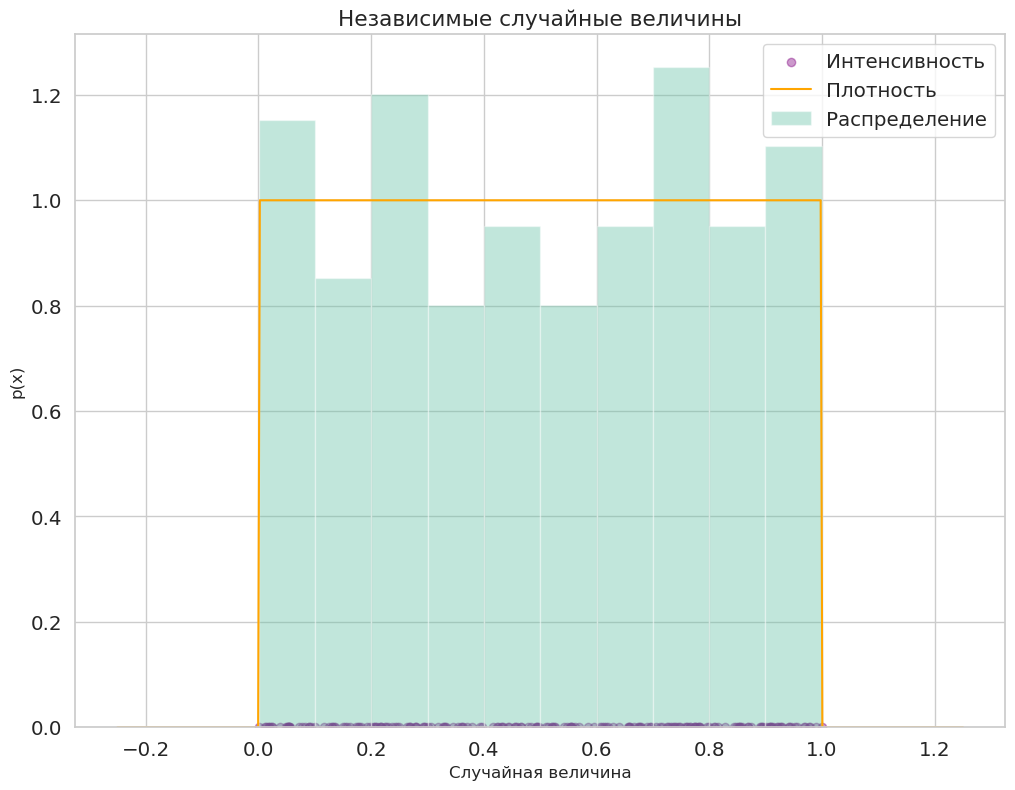

In [7]:
plot_uniform_density(size=200).show()

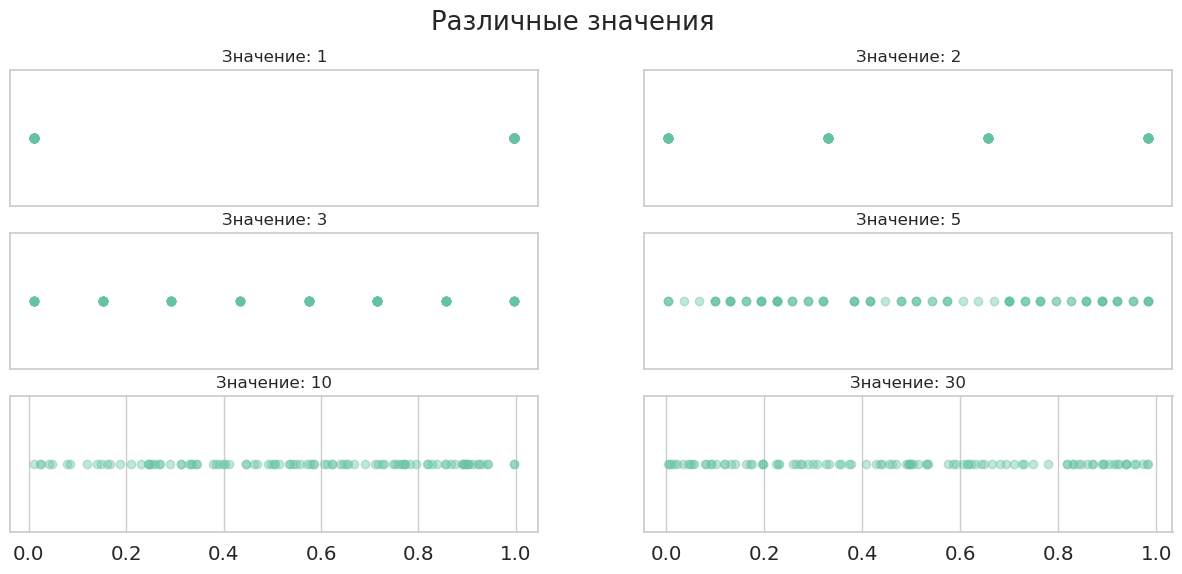

In [8]:
def plot_uniform_different_precision(size=100):
    plt.figure(figsize=(15,6))
    plt.suptitle('Различные значения')
    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        plt.subplot(3, 2, i + 1)
        plt.scatter(uniform(size, precision), np.zeros(size), alpha=0.4)
        plt.title('Значение: ' + str(precision), fontsize = 12)
        plt.yticks([])
        if i < 4:
            plt.xticks([])
    return plt.gcf()
plot_uniform_different_precision(size=100);

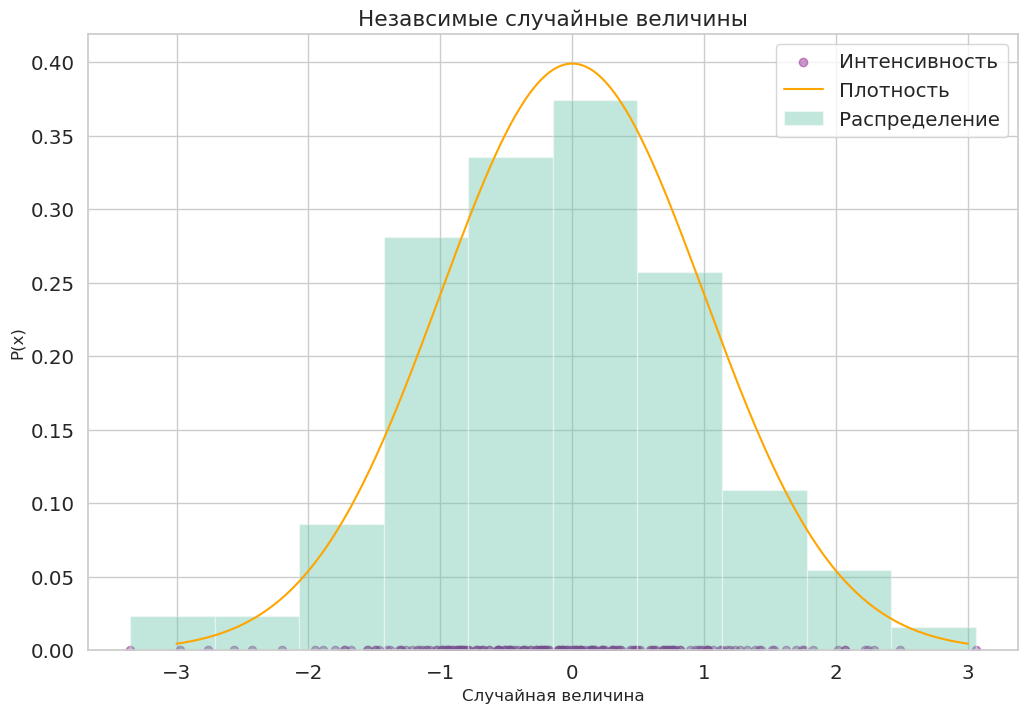

In [9]:
def normal(size=1, loc=0, scale=1, precision=30):
    first = uniform(size, precision)
    second = uniform(size, precision)
    return loc + scale * np.cos(2*np.pi*first) * np.sqrt(-2*np.log(second))

def plot_normal_density(size=200):
    plt.figure(figsize=(12,8))
    norm_uniform = normal(size)
    grid = np.linspace(-3, 3, 500)
    plt.scatter(norm_uniform, np.zeros(size), alpha=0.4, color='purple')
    plt.hist(norm_uniform, alpha=0.4, bins=10, density=True)
    new_norm = norm_pdf(grid)
    plt.plot(grid, new_norm, color='orange')
    plt.legend(['Интенсивность', 'Плотность','Распределение'])
    plt.title('Незавсимые случайные величины')
    plt.xlabel('Случайная величина', fontsize=12)
    plt.ylabel('Р(x)', fontsize=12)
    return plt.gcf()
plot_normal_density(size=200);

/tmp/ipykernel_4154/1428716482.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_expon_density(size=100).show()


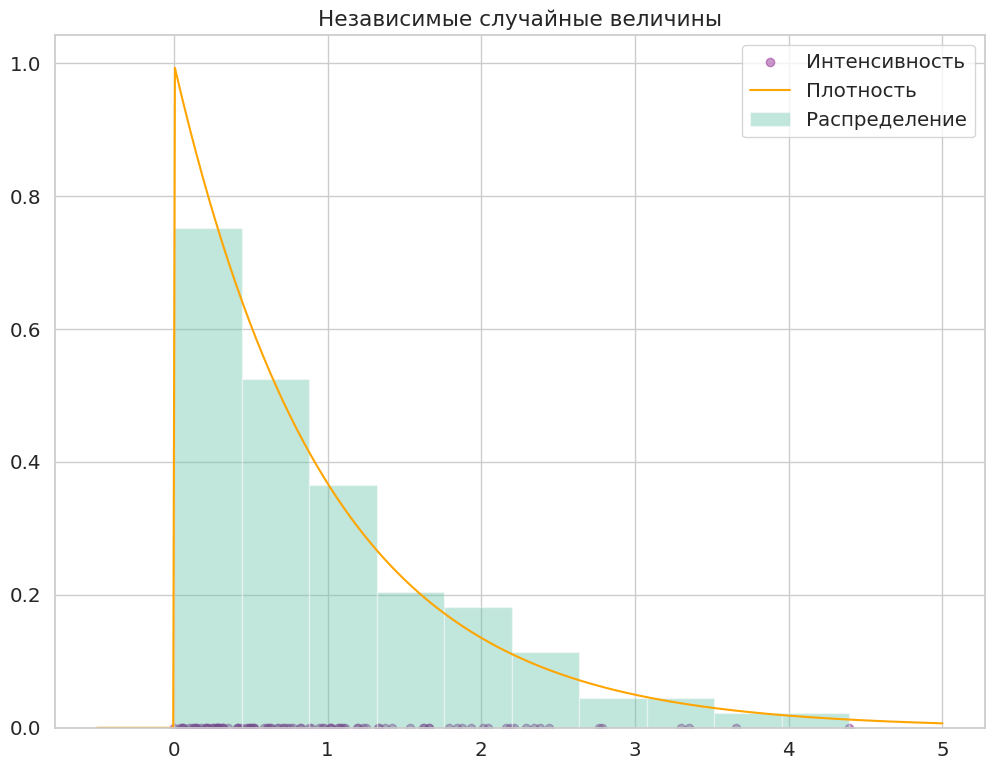

In [10]:
def expon(size=1, lambd=1, precision=30):
    return -1/lambd * np.log(1-uniform(size, precision))

def plot_expon_density(size=100):
    plt.figure(figsize=(12,9))
    grid = np.linspace(-0.5, 5, 500)
    precision = 30
    exp = expon(size)
    plt.scatter(exp, np.zeros(size), alpha=0.4, color='purple')
    plt.hist(exp, alpha=0.4, density=True, bins=10)
    new_grid = expon_pdf(grid)
    plt.plot(grid, new_grid, color='orange', label='Плотность случайной величины')
    plt.title('Независимые случайные величины')
    plt.legend(['Интенсивность', 'Плотность','Распределение'])
    return plt.gcf()

plot_expon_density(size=100).show()

**Выводы:**

Для экспримента было необходимо сгенерировать на отрезке [0,1] три равномерных распределений. Для каждого из них построены графики, и эксперимент показал, что при увеленчение точности равномерного распределния результат будет все более непрерывным. Т.е. исследование было для определения качество от точности. Так же была построена гистограмма для экспоненциального распределения. 

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

Text(0.5, 1.0, 'Сравнение распределений')

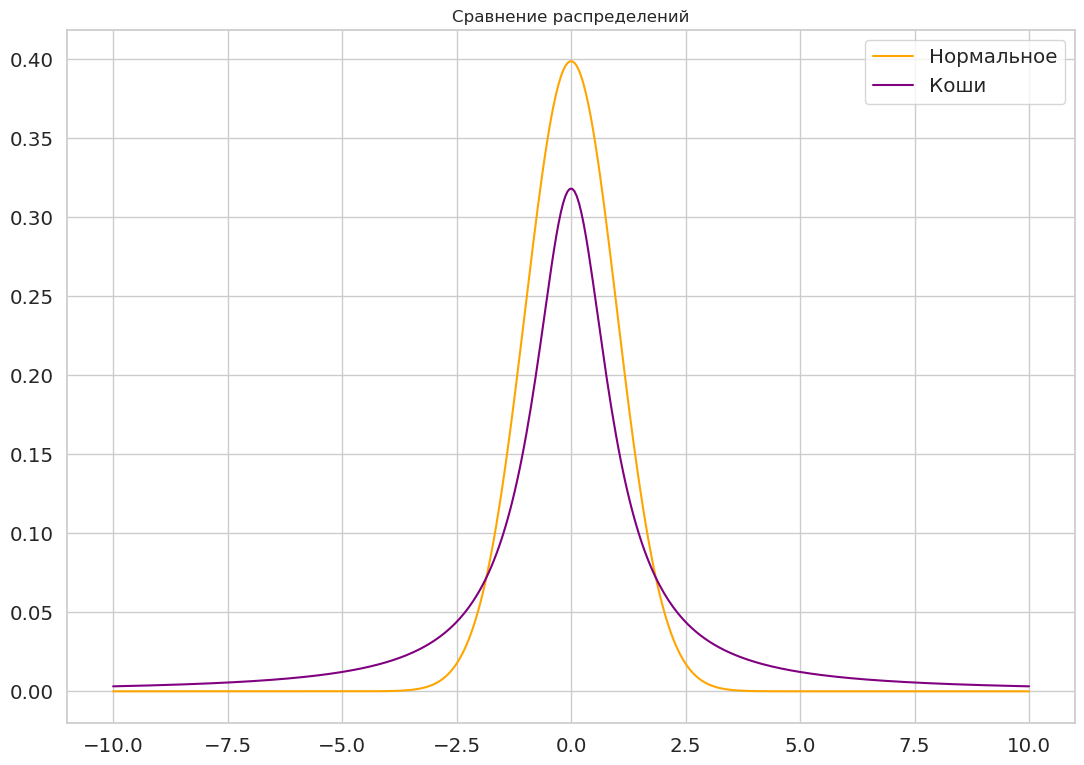

In [11]:
plt.figure(figsize=(13, 9))
grid = np.linspace(-10, 10, 400)
plt.plot(grid, sps.norm.pdf(grid), color='orange')
plt.plot(grid, sps.cauchy.pdf(grid), color='purple')
plt.legend(['Нормальное', 'Коши'])
plt.title("Сравнение распределений", fontsize=12)

Для распределения Коши:
визуально, они сильно похожи, но можно сказать, что концы распределения стремятся к нулью медленнее чем нормальное распределение, и пик распределения Коши ниже нормального. 

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

Так как было написано в блокноте, одного эксперимента мало, и соответственно повторяем 10 раз.

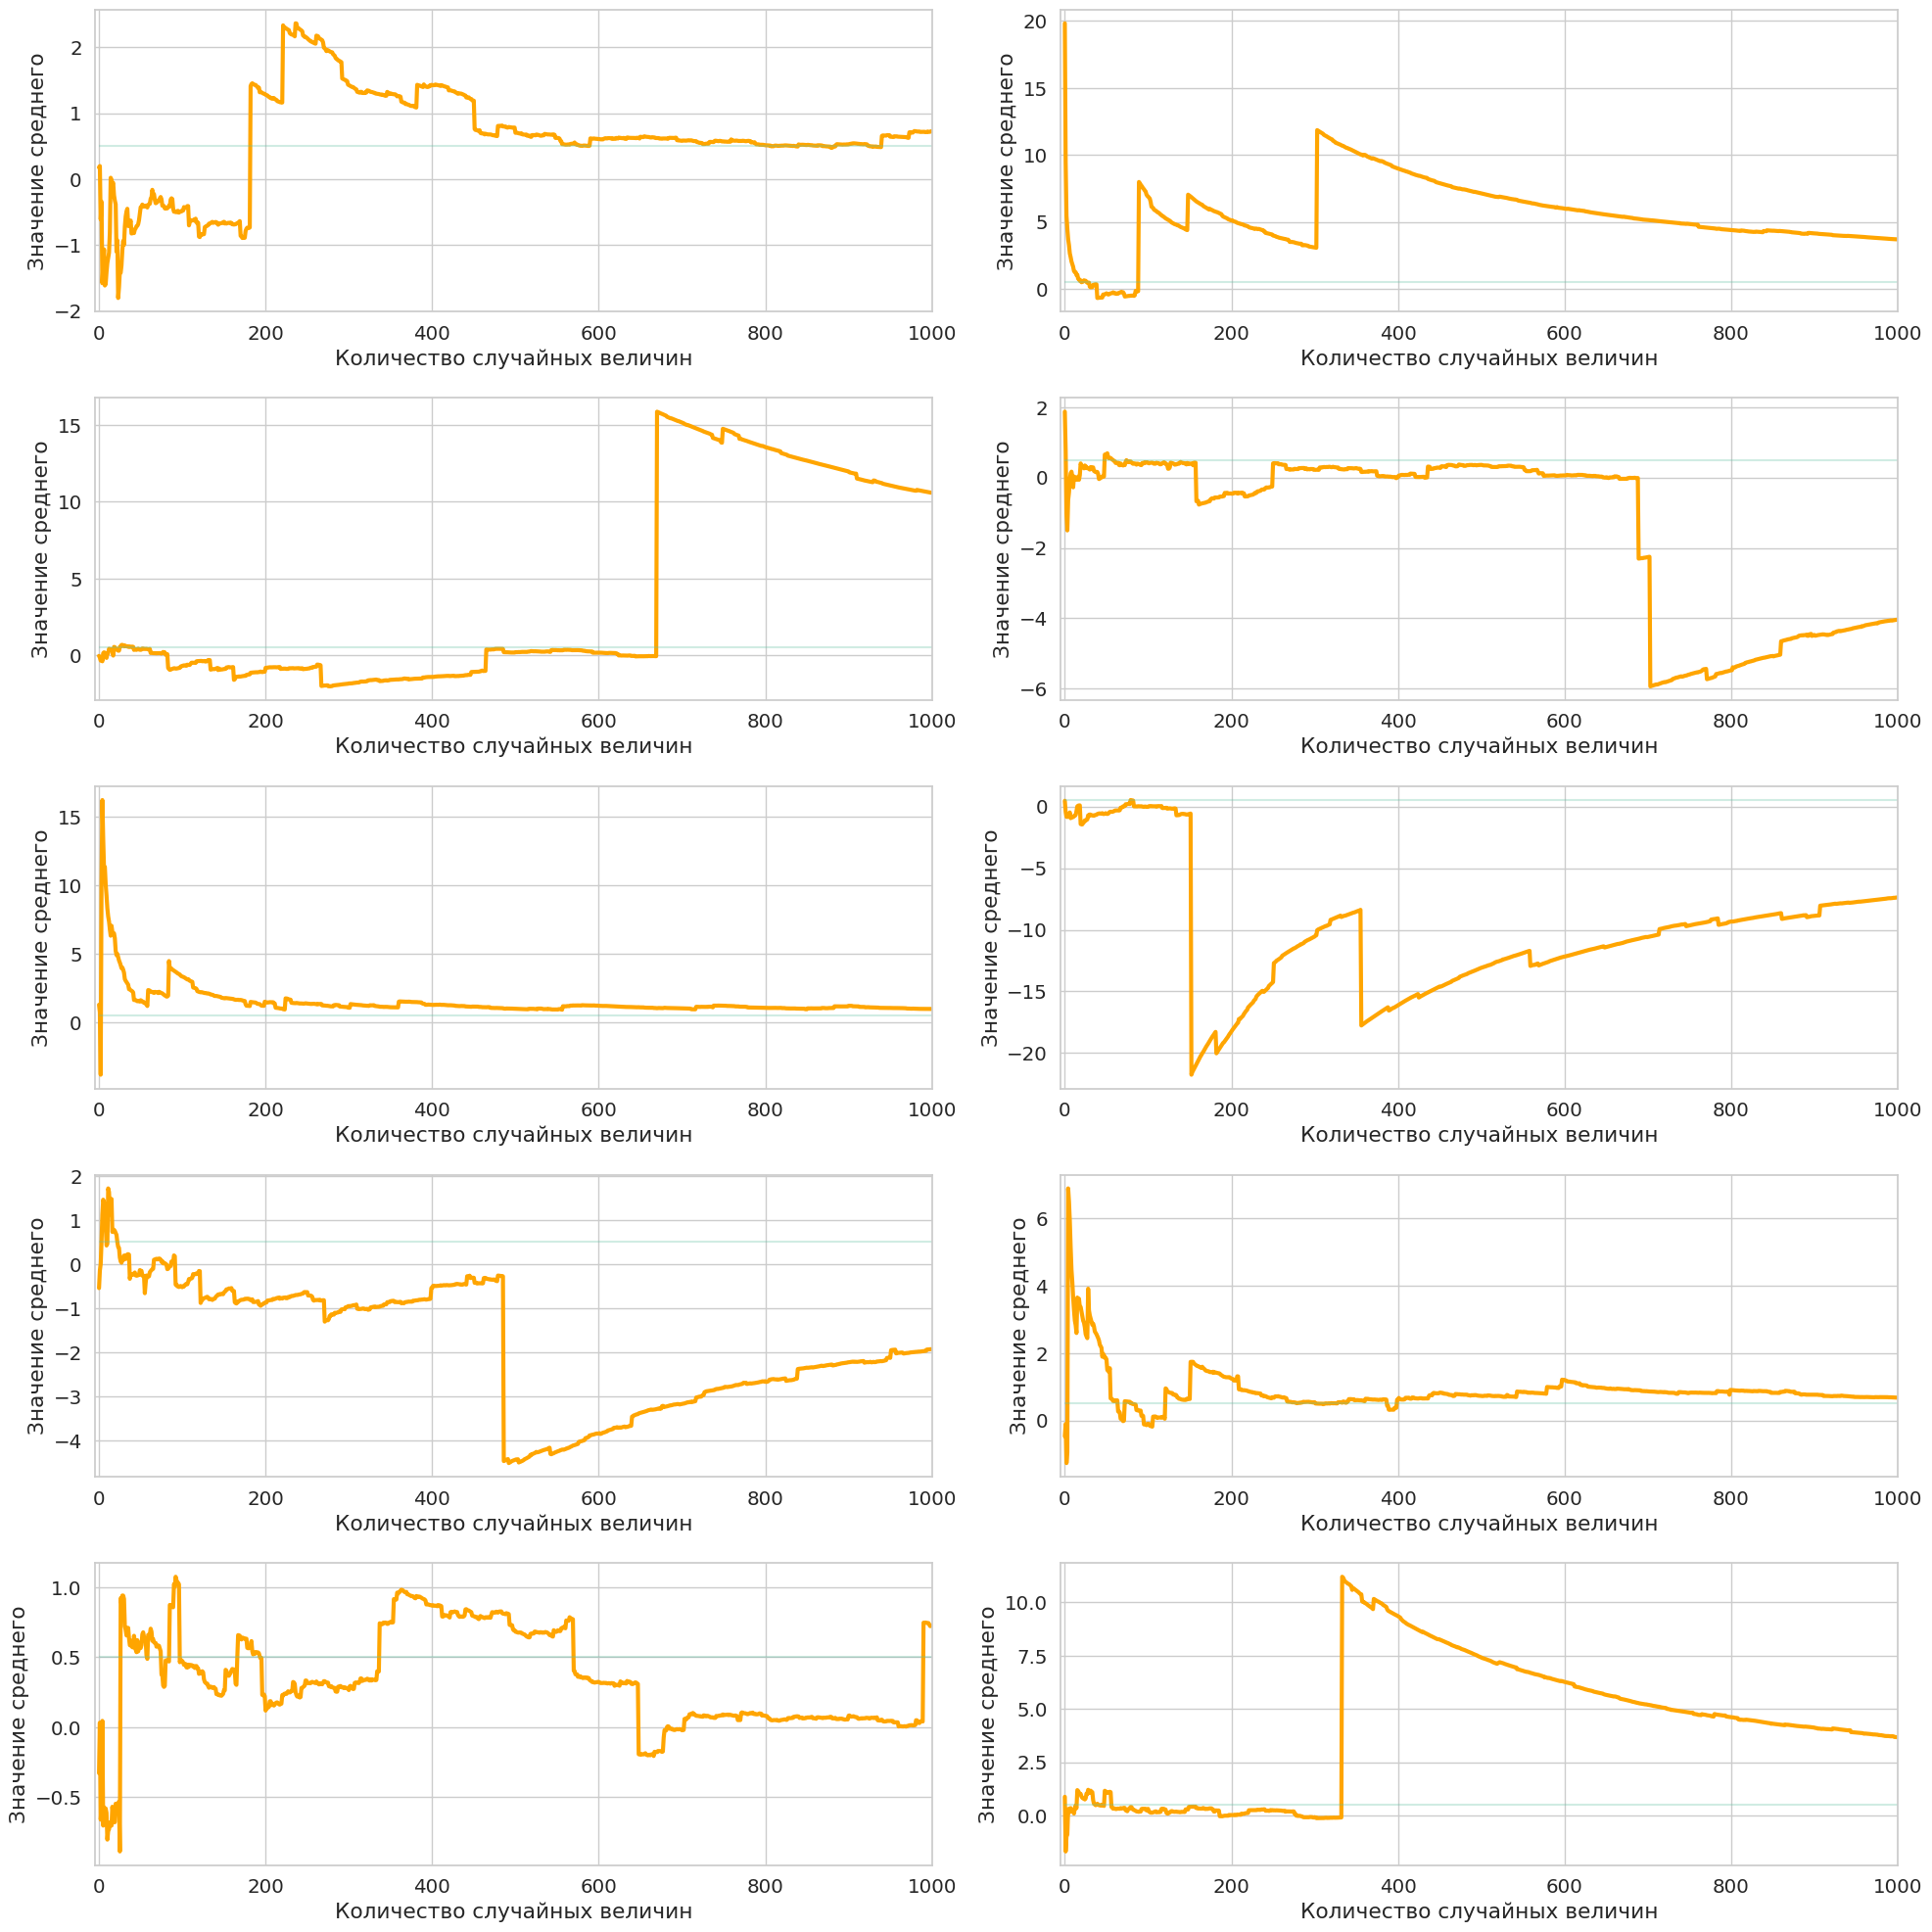

In [12]:
plt.figure(figsize=(20, 20))
for i in range(10):
    samples = sps.cauchy().rvs(size=1000)
    cum_means = samples.cumsum() / (np.arange(1000) + 1)
    plt.subplot(5, 2, i+1)
    plt.plot(cum_means, lw=3, color='orange')
    plt.hlines(0.5, 0, 1000, alpha=0.3)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, 1000))

plt.tight_layout()

Нам известно, что хоть распределение Коши будет стремится к нулью медленнее, но все таки сходится к нулью, но из этих 10 графиков много есть примеров что они не стремятся к нулью, (если нумеровать в стиле матрицы, т.е. выше рисунки матрица размера 5х2, и каждый элемент нумеруется как элементы матрицы). Например 2, 4, 6, 8, 10. И предел для бесконечных значений не существует. Соответственно, ЗБЧ для распределения Коши не работает.

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

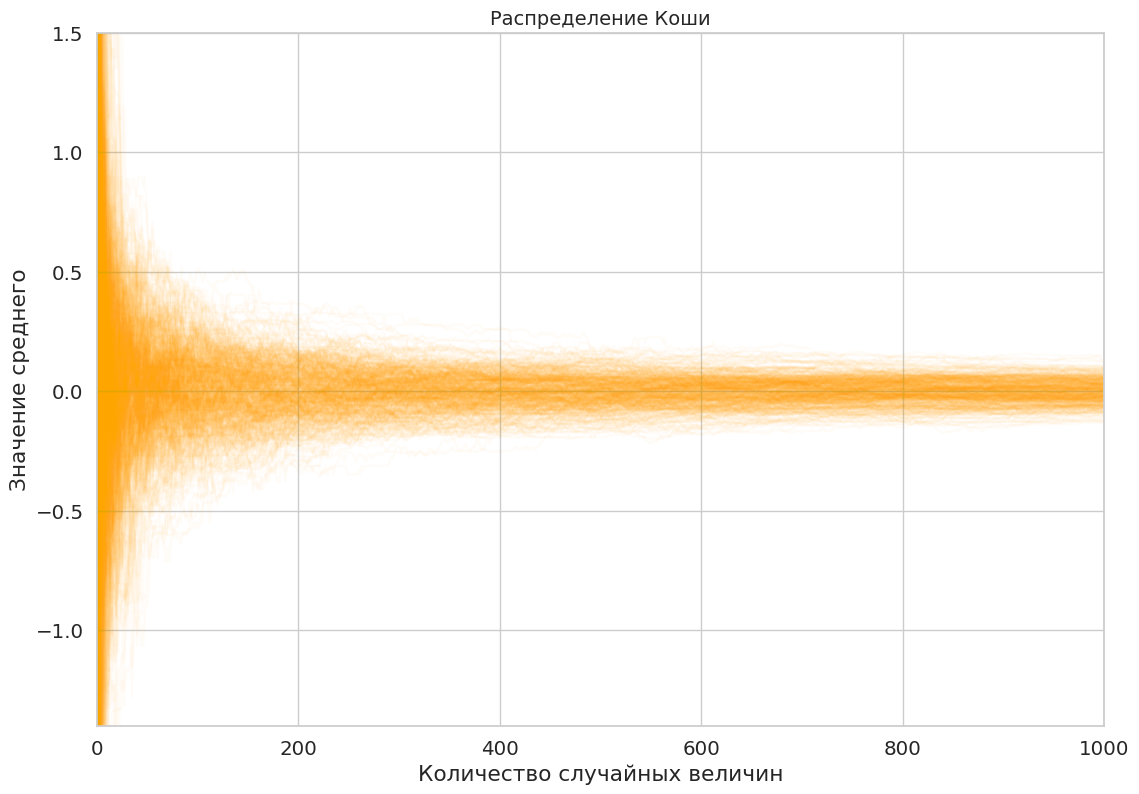

In [19]:
size = 1000
samples_count = 500
label = 'Распределение Коши'
samples = sps.cauchy.rvs(size=(samples_count, size))
plt.figure(figsize=(13, 9))
for i in range(samples_count):
    med = list(map(lambda x: np.median(samples[i][0:x]), (np.arange(size) + 1)))
    plt.plot(np.arange(size) + 1, med, color='orange', alpha=0.035)
plt.title(label, fontsize=14)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.ylim((-1.4, 1.5));
plt.xlim((0, size));
plt.show()

**Вывод:**
При больших количества случайных величин, особенно больше 200, постепенно стремятся к нулю. Т.е. при бесконечных значениях постепенно будет стермиться к нулю.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

In [199]:
size = 1000
def find_n(a=0.5, K=5000, count=1): # количество случайных величин
    s=0
    for i in range(count):
        samples = sps.bernoulli(a).rvs(size=(K, size))
        S = np.absolute(samples.cumsum(axis=1) / (np.arange(size) + 1)-a)
        F =  1/K*S.sum(axis=0)
        s+=np.min(np.where(F < 0.02, np.arange(size), np.ones(size)*size))
        return F, s

F, n = find_n()
n

395.0

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

In [195]:
new = []
for i in np.arange(0.05, 0.951, 0.05):
    new.append(find_n(i)[1])

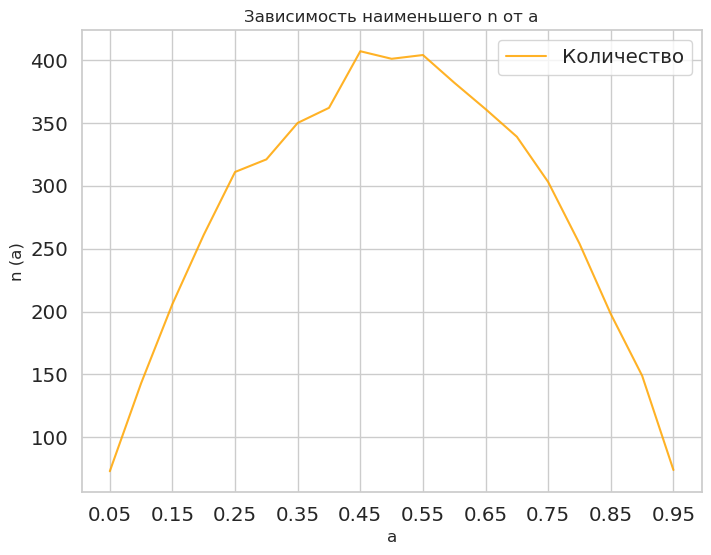

In [196]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(0.05, 0.951, 0.05), new, color='orange', alpha = 0.85)
plt.title('Зависимость наименьшего n от a', fontsize=12)
plt.xticks(np.arange(0.05, 0.951, 0.1))
plt.xlabel('a', fontsize=12)
plt.ylabel('n (a)', fontsize=12)
plt.legend(['Количество'])
plt.show()

**Выводы:**

Провели исследование по выборкам. Для а = 0,5 вычислили наименьшее n, для которого отклонение будет в районе 0,02. Следовательно, n = 395. Для зависимости n(a) можем по графику сказать, что пик в районе 0,5$\pm$0,05. 